In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
import sys

print(np.__version__)
print(pd.__version__)
print(scipy.__version__)
print(matplotlib.__version__)

1.26.0
2.1.1
1.11.2
3.8.0


In [2]:
x = 17

In [3]:
def getH(n):
    return 2 / 2**n

h = getH(np.arange(1, 22, 1))

In [4]:
def der1(f):
    return (f(x + h) - f(x)) / h

def der2(f):
    return (f(x) - f(x - h)) / h

def der3(f):
    return (f(x + h) - f(x - h)) / (2*h)

def der4(f):
    return 4/3 * (f(x + h) - f(x - h)) / (2*h) - 1/3 * (f(x + 2*h) - f(x - 2*h)) / (4*h)

def der5(f):
    return 3/2 * (f(x + h) - f(x - h)) / (2*h) - 3/5 * (f(x + 2*h) - f(x - 2*h)) / (4*h) + 1/10 * (f(x + 3*h) - f(x - 3*h)) / (6*h)

In [5]:
def __makePlot(f, anDer, cmDer, lb):
    delta = abs(cmDer(f) - anDer(x))
    delta[delta == 0.0] = min(delta[delta != 0.0])

    plt.plot(np.log2(h), np.log2(delta), 'o-', label=lb)

def makePlot(f, anDer):
    plt.figure(figsize=(20, 10))
    
    __makePlot(f, anDer, der1, r'$ f = \sin(x^2), \; f^{(1)} = 2x \cdot \cos(x^2) $')
    __makePlot(f, anDer, der2, r'$ f = \cos(\sin(x)), \; f^{(1)} = -\sin(\sin(x))\cos(x) $')
    __makePlot(f, anDer, der3, r'$ f = e^{sin(cos(x))}, \; f^{(1)} = -e^{sin(cos(x))}\cos(\cos(x))\sin(x) $')
    __makePlot(f, anDer, der4, r'$ f = \ln(x + 3), \; f^{(1)} = \frac{1}{x + 3} $')
    __makePlot(f, anDer, der5, r'$ f = (x + 3)^{0.5}, \; f^{(1)} = \frac{1}{2\sqrt{x + 3}} $')

    plt.plot(0, 0, alpha=0, label=r'$x = %(x)s$' % {'x': x})

    plt.xlabel(r'$ \log_2(h), \; h = \frac{2}{2^n} \; (n = \overline{1, 21}) $', fontsize=18)
    plt.ylabel(r'$ \log_2(\Delta), \; \Delta = |f^{(1)}(x) - f_i(x, h)| $', fontsize=18)

    plt.grid()
    plt.legend(fontsize=16)

## sin(x^2)

In [6]:
def sinx2(x):
    return np.sin(x**2)

def sinx2Der(x):
    return 2 * x * np.cos(x**2)

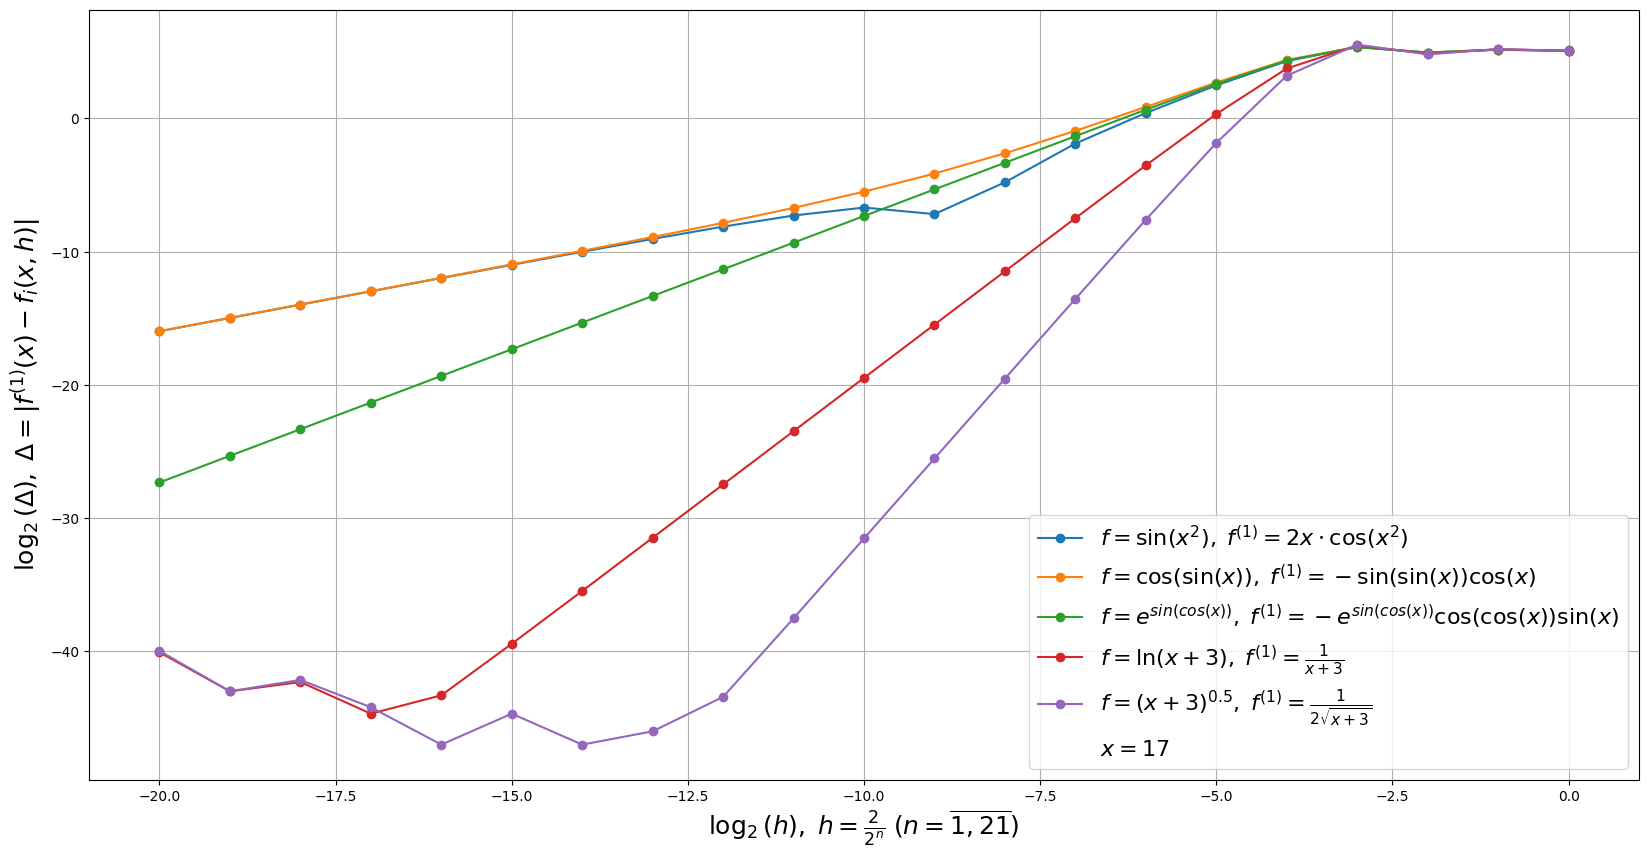

In [7]:
makePlot(sinx2, sinx2Der)